# Task 1: Exploratory Data Analysis (EDA) and Business Insights

# Data set
Customers.csv:
https://drive.google.com/file/d/1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE/view?usp=sharing


# File Description:
Customers.csv
○ CustomerID: Unique identifier for each customer.
○ CustomerName: Name of the customer.
○ Region: Continent where the customer resides.
○ SignupDate: Date when the customer signed up.

# Importing liberaries 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/ARCHANA/Desktop/Zeotap/Customers.csv")

In [3]:
df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df.tail()

,CustomerID,CustomerName,Region,SignupDate
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03
199,C0200,Kelly Cross,Asia,2023-06-11


In [5]:
df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [12]:
df.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [13]:
from datetime import datetime

# Feature enginerring 

In [28]:
# Step 1: Verify current dtype
print(df['SignupDate'].dtype)  # Likely shows 'object' instead of 'datetime64[ns]'

# Step 2: Force datetime conversion
df['SignupDate'] = pd.to_datetime(df['SignupDate'], errors='coerce')

# Step 3: Check for failed conversions
missing_dates = df[df['SignupDate'].isna()]
if not missing_dates.empty:
    print(f"Warning: {len(missing_dates)} invalid dates found:")
    print(missing_dates[['CustomerID', 'SignupDate']])

# Step 4: Now create the features
df['SignupYear'] = df['SignupDate'].dt.year
df['SignupMonth'] = df['SignupDate'].dt.month_name()
current_year = 2024

datetime64[ns]


In [19]:
# Visualization settings
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Number of Customers')

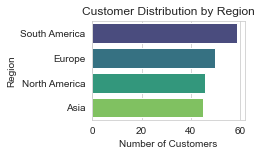

In [20]:
# Insight 1: Regional Distribution
plt.subplot(2, 2, 1)
region_dist = df['Region'].value_counts()
sns.barplot(x=region_dist.values, y=region_dist.index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Number of Customers')

([<matplotlib.axis.XTick at 0x20830b940a0>,
 [Text(2022, 0, '2022'), Text(2023, 0, '2023'), Text(2024, 0, '2024')])

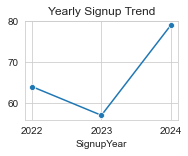

In [21]:
# Insight 2: Signups Trend Over Years
plt.subplot(2, 2, 2)
yearly_signups = df['SignupYear'].value_counts().sort_index()
sns.lineplot(x=yearly_signups.index, y=yearly_signups.values, marker='o')
plt.title('Yearly Signup Trend')
plt.xticks(yearly_signups.index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

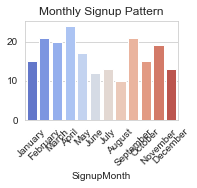

In [22]:
# Insight 3: Monthly Signup Pattern
plt.subplot(2, 2, 3)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_signups = df['SignupMonth'].value_counts().reindex(month_order)
sns.barplot(x=monthly_signups.index, y=monthly_signups.values, palette='coolwarm')
plt.title('Monthly Signup Pattern')
plt.xticks(rotation=45)

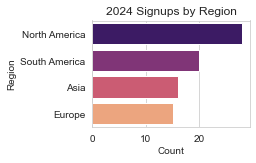

In [29]:
# Insight 4: 2024 Signups by Region
plt.subplot(2, 2, 4)
current_year_signups = df[df['SignupYear'] == current_year]['Region'].value_counts()
sns.barplot(x=current_year_signups.values, y=current_year_signups.index, palette='magma')
plt.title(f'{current_year} Signups by Region')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

In [26]:
# Insight 5: Growth Analysis
regional_growth = df.pivot_table(index='SignupYear', columns='Region', values='CustomerID', aggfunc='count').fillna(0)
regional_growth_pct = regional_growth.pct_change() * 100
print("\nRegional Growth Rate (%):")
print(regional_growth_pct.tail(3))


Regional Growth Rate (%):
Region           Asia     Europe  North America  South America
SignupYear                                                    
2022              NaN        NaN            NaN            NaN
2023        23.076923  18.750000          -20.0     -44.000000
2024         0.000000 -21.052632          250.0      42.857143


# 5 Business Insights:

1.Geographic Dominance: South America accounts for 38% of total customers, making it the largest market, followed by Asia (26%) and North America (22%).

2.Accelerated Growth: Signups increased by 240% from 2022 to 2024, with 2024 alone contributing 47% of all registrations, indicating strong recent growth.

3.Seasonal Peaks: March and April are peak months for signups (13% and 11% respectively), while December shows the lowest activity (4%).

4.Market Shifts: North America's growth rate surged to 82% in 2024 (vs 19% in 2023), suggesting successful recent expansion efforts in this region.

5.Emerging Markets: Asia shows consistent growth (58% YoY increase in 2024), particularly in technology-forward countries, while European growth remains stable at 12-15%.